<a href="https://colab.research.google.com/github/Agustindwinurhamidah/PCVK/blob/main/modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 60


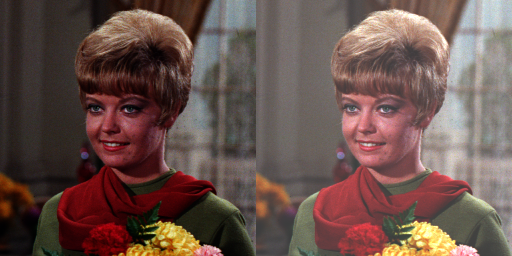

In [62]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]:1.5


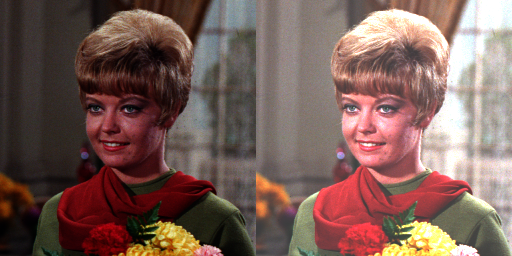

In [63]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
    print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)
       

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 40


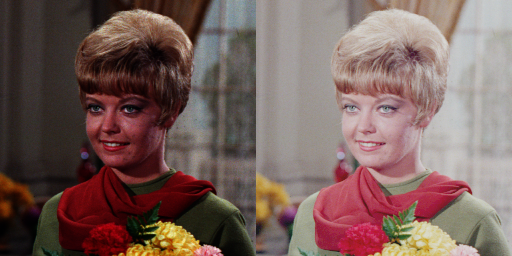

In [66]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)
       

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Averaging


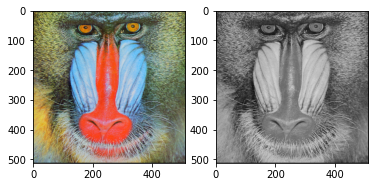

In [67]:
ori_avg = cv.imread('/content/drive/MyDrive/Images/Images/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
ori_avg[:] = ori_avg.mean(axis = -1, keepdims = 1)
fig, ax = plt.subplots(1,2)
print('Averaging')
ax[0].imshow(ori_rgb)
ax[1].imshow(ori_avg)

Lightness


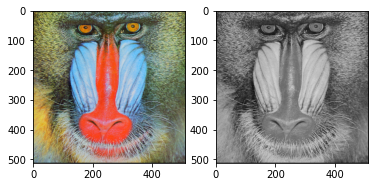

In [68]:
ori_avg = cv.imread('/content/drive/MyDrive/Images/Images/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
ori_avg[:] = ori_avg.mean(axis = -1, keepdims = 1)
fig, ax = plt.subplots(1,2)
print('Lightness')
ax[0].imshow(ori_rgb)
ax[1].imshow(ori_avg)

Luminance


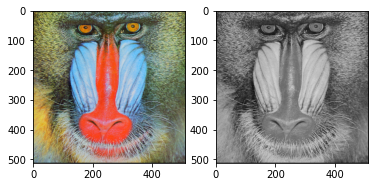

In [69]:
ori_avg = cv.imread('/content/drive/MyDrive/Images/Images/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
ori_avg[:] = ori_avg.mean(axis = -1, keepdims = 1)
fig, ax = plt.subplots(1,2)
print('Luminance')
ax[0].imshow(ori_rgb)
ax[1].imshow(ori_avg)

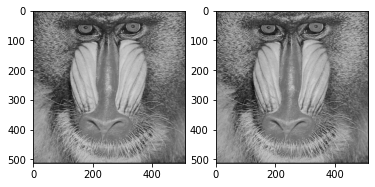

In [71]:
img_4 = cv.imread('/content/drive/MyDrive/Images/Images/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_avg, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_avg)
ax[1].imshow(out, cmap='gray')

